# ARMAN

This notebook is for developing the core manipulator structure for arman

## TODO:
 - correct forward kinematics (joint solver)
     - Denavit-Hartenburg and geometrically
 - Do we need dynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## Math-Work

forward Kinematics (geometric)

In [3]:
"""
In this example the frame A is the world frame the frame B is joint0's frame, C is joint1's and so on.
each set of transform operations represents a stack in the arm class, the next step is to turn this into 
a speed and torque calculator.
"""
BphiA = 0.0
BthetaA = 0.0
BpsiA = 0.0
BdispA = (0.0,0.0,0.0)
pointBx = np.array([1.0, 0.0, 0.0, 1.0])
pointBy = np.array([0.0, 1.0, 0.0, 1.0])
pointBz = np.array([0.0, 0.0, 1.0, 1.0])
bRa = np.matrix([[np.cos(BthetaA)*np.cos(BpsiA), -np.cos(BthetaA)*np.sin(BpsiA), np.sin(BthetaA), BdispA[0]],
                [(np.sin(BphiA)*np.sin(BthetaA)*np.cos(BpsiA))+(np.cos(BphiA)*np.sin(BpsiA)), (np.cos(BphiA)*np.cos(BpsiA))-(np.sin(BphiA)*np.sin(BthetaA)*np.sin(BpsiA)), -np.sin(BphiA)*np.cos(BthetaA), BdispA[1]],
                [(np.sin(BphiA)*np.sin(BpsiA))-(np.cos(BphiA)*np.sin(BthetaA)*np.cos(BpsiA)), (np.cos(BphiA)*np.sin(BthetaA)*np.sin(BpsiA))+(np.sin(BphiA)*np.cos(BpsiA)), np.cos(BphiA)*np.cos(BthetaA), BdispA[2]],
                [0,0,0,1]])
assert bRa.shape == (4,4), f'R1 shape mismatch {bRa.shape}'
assert pointBx.shape == (4,), f'PointA shape mismatch {pointB.shape}'
pointAx = np.array(np.matmul(bRa, np.array(pointBx).T)).reshape(4)
pointAy = np.array(np.matmul(bRa, np.array(pointBy).T)).reshape(4)
pointAz = np.array(np.matmul(bRa, np.array(pointBz).T)).reshape(4)
print(f'Transforming: ...\n\nB:\n{np.array([pointBx,pointBy,pointBz])}\n\nb->a:\n{np.array([pointAx,pointAy,pointAz])}\n\n')

CphiB = np.pi/2
CthetaB = 0.0
CpsiB = 0.0
CdispB = (0.0,0.0,0.0)
pointCx = np.array([1.0, 0.0, 0.0, 1.0])
pointCy = np.array([0.0, 1.0, 0.0, 1.0])
pointCz = np.array([0.0, 0.0, 1.0, 1.0])
cRb = np.matrix([[np.cos(CthetaB)*np.cos(CpsiB), -np.cos(CthetaB)*np.sin(CpsiB), np.sin(CthetaB), CdispB[0]],
                [(np.sin(CphiB)*np.sin(CthetaB)*np.cos(CpsiB))+(np.cos(CphiB)*np.sin(CpsiB)), (np.cos(CphiB)*np.cos(CpsiB))-(np.sin(CphiB)*np.sin(CthetaB)*np.sin(CpsiB)), -np.sin(CphiB)*np.cos(CthetaB), CdispB[1]],
                [(np.sin(CphiB)*np.sin(CpsiB))-(np.cos(CphiB)*np.sin(CthetaB)*np.cos(CpsiB)), (np.cos(CphiB)*np.sin(CthetaB)*np.sin(CpsiB))+(np.sin(CphiB)*np.cos(CpsiB)), np.cos(CphiB)*np.cos(CthetaB), CdispB[2]],
                [0,0,0,1]])
assert cRb.shape == (4,4), f'R1 shape mismatch {cRb.shape}'
assert pointCx.shape == (4,), f'PointCx shape mismatch {pointCx.shape}'
pointBx = np.array(np.matmul(cRb, np.array(pointCx).T)).reshape(4)
pointBy = np.array(np.matmul(cRb, np.array(pointCy).T)).reshape(4)
pointBz = np.array(np.matmul(cRb, np.array(pointCz).T)).reshape(4)
pointAx = np.array(np.matmul(bRa, np.array(pointBx).T)).reshape(4)
pointAy = np.array(np.matmul(bRa, np.array(pointBy).T)).reshape(4)
pointAz = np.array(np.matmul(bRa, np.array(pointBz).T)).reshape(4)
print(f'Transforming: ... \nC:\n{np.array([pointCx,pointCy,pointCz])}\n\nc->b:\n{np.array([pointBx,pointBy,pointBz])}\n\nb->a:\n{np.array([pointAx,pointAy,pointAz])}\n\n')


DphiC = 0.0
DthetaC = 0.0
DpsiC = np.pi/2
DdispC = (11.5,0.0,0.0)
pointDx = np.array([1.0, 0.0, 0.0, 1.0])
pointDy = np.array([0.0, 1.0, 0.0, 1.0])
pointDz = np.array([0.0, 0.0, 1.0, 1.0])
dRc = np.matrix([[np.cos(DthetaC)*np.cos(DpsiC), -np.cos(DthetaC)*np.sin(DpsiC), np.sin(DthetaC), DdispC[0]],
                [(np.sin(DphiC)*np.sin(DthetaC)*np.cos(CpsiB))+(np.cos(DphiC)*np.sin(DpsiC)), (np.cos(DphiC)*np.cos(DpsiC))-(np.sin(DphiC)*np.sin(DthetaC)*np.sin(DpsiC)), -np.sin(DphiC)*np.cos(DthetaC), CdispB[1]],
                [(np.sin(DphiC)*np.sin(DpsiC))-(np.cos(DphiC)*np.sin(DthetaC)*np.cos(DpsiC)), (np.cos(DphiC)*np.sin(DthetaC)*np.sin(DpsiC))+(np.sin(DphiC)*np.cos(DpsiC)), np.cos(DphiC)*np.cos(DthetaC), CdispB[2]],
                [0,0,0,1]])
assert dRc.shape == (4,4), f'dRc shape mismatch {dRc.shape}'
assert pointDx.shape == (4,), f'PointDx shape mismatch {pointDx.shape}'
pointCx = np.array(np.matmul(dRc, np.array(pointDx).T)).reshape(4)
pointCy = np.array(np.matmul(dRc, np.array(pointDy).T)).reshape(4)
pointCz = np.array(np.matmul(dRc, np.array(pointDz).T)).reshape(4)
pointBx = np.array(np.matmul(cRb, np.array(pointCx).T)).reshape(4)
pointBy = np.array(np.matmul(cRb, np.array(pointCy).T)).reshape(4)
pointBz = np.array(np.matmul(cRb, np.array(pointCz).T)).reshape(4)
pointAx = np.array(np.matmul(bRa, np.array(pointBx).T)).reshape(4)
pointAy = np.array(np.matmul(bRa, np.array(pointBy).T)).reshape(4)
pointAz = np.array(np.matmul(bRa, np.array(pointBz).T)).reshape(4)
print(f'Transforming: ... \nD:\n{np.array([pointDx,pointDy,pointDz])}\nd->c:\n{np.array([pointCx,pointCy,pointCz])}\n\nc->b:\n{np.array([pointBx,pointBy,pointBz])}\n\nb->a:\n{np.array([pointAx,pointAy,pointAz])}')

Transforming: ...

B:
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]]

b->a:
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]]


Transforming: ... 
C:
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]]

c->b:
[[ 1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  6.123234e-17  1.000000e+00  1.000000e+00]
 [ 0.000000e+00 -1.000000e+00  6.123234e-17  1.000000e+00]]

b->a:
[[ 1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  6.123234e-17  1.000000e+00  1.000000e+00]
 [ 0.000000e+00 -1.000000e+00  6.123234e-17  1.000000e+00]]


Transforming: ... 
D:
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]]
d->c:
[[1.150000e+01 1.000000e+00 0.000000e+00 1.000000e+00]
 [1.050000e+01 6.123234e-17 0.000000e+00 1.000000e+00]
 [1.150000e+01 0.000000e+00 1.000000e+00 1.000000e+00]]

c->b:
[[ 1.15000000e+01  6.12323400e-17  1.00000000e+00  1.00000000e+00]
 [ 1.05000000e+01  3.74939946e-33  6.12323400e-17  1.00000000e+00]
 [ 1.15000000e+01 -1.00000000e+00  6.12323400e-17  1.000

In [75]:
""" This example makes use of the Associative property as a time/space optimization"""
BphiA = 0.0
BthetaA = 0.0
BpsiA = 0.0
BdispA = (0.0,0.0,0.0)
pointBx = np.array([1.0, 0.0, 0.0, 1.0])
pointBy = np.array([0.0, 1.0, 0.0, 1.0])
pointBz = np.array([0.0, 0.0, 1.0, 1.0])
bRa = np.matrix([[np.cos(BthetaA)*np.cos(BpsiA), -np.cos(BthetaA)*np.sin(BpsiA), np.sin(BthetaA), BdispA[0]],
                [(np.sin(BphiA)*np.sin(BthetaA)*np.cos(BpsiA))+(np.cos(BphiA)*np.sin(BpsiA)), (np.cos(BphiA)*np.cos(BpsiA))-(np.sin(BphiA)*np.sin(BthetaA)*np.sin(BpsiA)), -np.sin(BphiA)*np.cos(BthetaA), BdispA[1]],
                [(np.sin(BphiA)*np.sin(BpsiA))-(np.cos(BphiA)*np.sin(BthetaA)*np.cos(BpsiA)), (np.cos(BphiA)*np.sin(BthetaA)*np.sin(BpsiA))+(np.sin(BphiA)*np.cos(BpsiA)), np.cos(BphiA)*np.cos(BthetaA), BdispA[2]],
                [0,0,0,1]])
assert bRa.shape == (4,4), f'R1 shape mismatch {bRa.shape}'
assert pointBx.shape == (4,), f'PointA shape mismatch {pointB.shape}'
pointAx = np.array(np.matmul(bRa, np.array(pointBx).T)).reshape(4)
pointAy = np.array(np.matmul(bRa, np.array(pointBy).T)).reshape(4)
pointAz = np.array(np.matmul(bRa, np.array(pointBz).T)).reshape(4)
print(f'Transforming: ...\n\nB:\n{np.array([pointBx,pointBy,pointBz])}\n\nb->a:\n{np.array([pointAx,pointAy,pointAz])}\n\n')

CphiB = np.pi/2
CthetaB = 0.0
CpsiB = 0.0
CdispB = (0.0,0.0,0.0)
pointCx = np.array([1.0, 0.0, 0.0, 1.0])
pointCy = np.array([0.0, 1.0, 0.0, 1.0])
pointCz = np.array([0.0, 0.0, 1.0, 1.0])
cRb = np.matrix([[np.cos(CthetaB)*np.cos(CpsiB), -np.cos(CthetaB)*np.sin(CpsiB), np.sin(CthetaB), CdispB[0]],
                [(np.sin(CphiB)*np.sin(CthetaB)*np.cos(CpsiB))+(np.cos(CphiB)*np.sin(CpsiB)), (np.cos(CphiB)*np.cos(CpsiB))-(np.sin(CphiB)*np.sin(CthetaB)*np.sin(CpsiB)), -np.sin(CphiB)*np.cos(CthetaB), CdispB[1]],
                [(np.sin(CphiB)*np.sin(CpsiB))-(np.cos(CphiB)*np.sin(CthetaB)*np.cos(CpsiB)), (np.cos(CphiB)*np.sin(CthetaB)*np.sin(CpsiB))+(np.sin(CphiB)*np.cos(CpsiB)), np.cos(CphiB)*np.cos(CthetaB), CdispB[2]],
                [0,0,0,1]])
assert cRb.shape == (4,4), f'R1 shape mismatch {cRb.shape}'
assert pointCx.shape == (4,), f'PointCx shape mismatch {pointCx.shape}'
cRa = np.array(np.matmul(bRa, cRb))
pointAx = np.array(np.matmul(cRa, np.array(pointCx).T)).reshape(4)
pointAy = np.array(np.matmul(cRa, np.array(pointCy).T)).reshape(4)
pointAz = np.array(np.matmul(cRa, np.array(pointCz).T)).reshape(4)
print(f'Transforming: ... \nC:\n{np.array([pointCx,pointCy,pointCz])}\n\nc->a:\n{np.array([pointAx,pointAy,pointAz])}\n\n')


Transforming: ...

B:
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]]

b->a:
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]]


Transforming: ... 
C:
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]]

c->a:
[[ 1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  6.123234e-17  1.000000e+00  1.000000e+00]
 [ 0.000000e+00 -1.000000e+00  6.123234e-17  1.000000e+00]]




In [113]:
""" This example explores using xyz vs zyx vs yxz rotations"""        
def axis_to_string(axis):
    return f'Origin\t:{axis[0]} \nX\t:{axis[1]} \nY\t:{axis[2]} \nZ\t:{axis[3]}\n\n'

def run_transform(tf, labels):
    frame = np.array([[0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
    assert len(tf) == len(labels), 'run_transform failed: transform and label shape differ'
    for i in range(len(tf)):
        for j, point in enumerate(frame):
            frame[j] = np.array(np.matmul(tf[i], point.T)).reshape(3)
        print(f'Tf-{labels[i]}\n')
        print(axis_to_string(frame))

phi = -np.pi/2
Rx = np.matrix([[1.0, 0.0, 0.0],
               [0.0, np.cos(phi), np.sin(phi)],
               [0.0, -np.sin(phi), np.cos(phi)]])

theta = 0.0
Ry = np.matrix([[np.cos(theta), 0.0, -np.sin(theta)],
               [0.0, 1.0, 0.0],
               [np.sin(theta), 0.0, np.cos(theta)]])

psi = -np.pi/2
Rz = np.matrix([[np.cos(psi), np.sin(psi), 0.0],
               [-np.sin(psi), np.cos(psi), 0.0],
               [0.0, 0.0, 1.0]])

print(f'XYZ Transform:\n')
run_transform([Rx, Ry, Rz], ['X', 'Y', 'Z'])
    
print(f'ZYX Transform:\n')
run_transform([Rz, Ry, Rx], ['Z', 'Y', 'X'])

print(f'YZX Transform:\n')
run_transform([Ry, Rz, Rx], ['Y', 'Z', 'X'])

XYZ Transform:

Tf-X

Origin	:[0. 0. 0.] 
X	:[1. 0. 0.] 
Y	:[0.000000e+00 6.123234e-17 1.000000e+00] 
Z	:[ 0.000000e+00 -1.000000e+00  6.123234e-17]


Tf-Y

Origin	:[0. 0. 0.] 
X	:[1. 0. 0.] 
Y	:[0.000000e+00 6.123234e-17 1.000000e+00] 
Z	:[ 0.000000e+00 -1.000000e+00  6.123234e-17]


Tf-Z

Origin	:[0. 0. 0.] 
X	:[6.123234e-17 1.000000e+00 0.000000e+00] 
Y	:[-6.12323400e-17  3.74939946e-33  1.00000000e+00] 
Z	:[ 1.000000e+00 -6.123234e-17  6.123234e-17]


ZYX Transform:

Tf-Z

Origin	:[0. 0. 0.] 
X	:[6.123234e-17 1.000000e+00 0.000000e+00] 
Y	:[-1.000000e+00  6.123234e-17  0.000000e+00] 
Z	:[0. 0. 1.]


Tf-Y

Origin	:[0. 0. 0.] 
X	:[6.123234e-17 1.000000e+00 0.000000e+00] 
Y	:[-1.000000e+00  6.123234e-17  0.000000e+00] 
Z	:[0. 0. 1.]


Tf-X

Origin	:[0. 0. 0.] 
X	:[6.123234e-17 6.123234e-17 1.000000e+00] 
Y	:[-1.00000000e+00  3.74939946e-33  6.12323400e-17] 
Z	:[ 0.000000e+00 -1.000000e+00  6.123234e-17]


YZX Transform:

Tf-Y

Origin	:[0. 0. 0.] 
X	:[1. 0. 0.] 
Y	:[0. 1. 0.] 
Z	:[0. 0

## Transformer class
 - This class is the framework for how transforms are done
 - The goal is to use it to quickly do forward kinematics on any arm
 - the next steps are to add velocity and acceleration predictions

In [214]:
class Transformer:
    def __init__(self, phi, theta, psi, name, protocol=['psi', 'theta', 'phi'], translation=np.array([0.0,0.0,0.0]), parent=None):
        self.name = name
        self.child = None
        self.parent = parent
        self.R = np.matrix([[1.0,0.0,0.0],
                           [0.0,1.0,0.0],
                           [0.0,0.0,1.0]])
        self.build_rotation(phi, theta, psi, protocol)
        self.tf = self.add_translation(self.R, translation)
        self.tfI = self.add_translation(self.R.T, translation)
        
    def Rphi(self, phi):
        return np.matrix([[1.0, 0.0, 0.0],
               [0.0, np.cos(phi), np.sin(phi)],
               [0.0, -np.sin(phi), np.cos(phi)]])
        
    def Rtheta(self, theta):
        return np.matrix([[np.cos(theta), 0.0, -np.sin(theta)],
               [0.0, 1.0, 0.0],
               [np.sin(theta), 0.0, np.cos(theta)]])
    
    def Rpsi(self, psi):
        return np.matrix([[np.cos(psi), np.sin(psi), 0.0],
               [-np.sin(psi), np.cos(psi), 0.0],
               [0.0, 0.0, 1.0]])
    
    def build_rotation(self, phi, theta, psi, protocol):
        self.R = np.matrix([[1.0,0.0,0.0],
                           [0.0,1.0,0.0],
                           [0.0,0.0,1.0]])
        for step in protocol[::-1]:
            if step == 'phi':
                self.R = np.matmul(self.R, self.Rphi(phi))
            elif step == 'theta':
                self.R = np.matmul(self.R, self.Rtheta(theta))
            else:
                self.R = np.matmul(self.R, self.Rpsi(psi))
    
    def add_translation(self, R, translation):
        n,m = R.shape
        assert len(translation) == n, f'Translation dimension does not equal Rotation dimension: {len(translation)} != {n+1}'
        new_tf = np.zeros((n+1,m+1))
        for i, row in enumerate(R):
            new_tf[i] = np.concatenate([np.array(row).reshape(m), [translation[i]]])
        new_tf[m,n] = 1.0
        return new_tf
    
    def transform(self, point, inverse=False):
        """ input/output: a 3d cartesian point as numpy array
        """
        if len(point) == 3:
            point = np.concatenate([point, [1.0]])    
        assert point.shape == (4,), 'Illegal point: cannot transform'
        if inverse:
            point = np.array(np.matmul(self.tfI, point.T)).reshape(4) 
        else:
            point = np.array(np.matmul(self.tf, point.T)).reshape(4) 
        return np.array(point[:3])
    

In [198]:
def axis_to_string(axis):
    return f'Origin\t:{axis[0]} \nX\t:{axis[1]} \nY\t:{axis[2]} \nZ\t:{axis[3]}\n\n'

def run_transform(tf):
    frame = np.array([[0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
    while not tf is None:
        for j, point in enumerate(frame):
            frame[j] = tf.transform(point, inverse=True)
        tf = tf.parent
    print(axis_to_string(frame))

tf0 = Transformer(np.pi/2, 0.0, np.pi/2, 'joint1', protocol=['psi', 'theta', 'phi'], translation=np.array([0.0,0.0,2.0]))
print(f'Joint1 -> World\n')
run_transform(tf0)
tf1 = Transformer(0.0, 0.0, np.pi/2, 'joint2', translation=np.array([11.5,0.0,0.0]), parent=tf0)
print(f'Joint2 -> World\n')
run_transform(tf1)

[6.123234e-17 1.000000e+00 0.000000e+00] [0.0]
[-6.12323400e-17  3.74939946e-33  1.00000000e+00] [0.0]
[ 1.000000e+00 -6.123234e-17  6.123234e-17] [2.0]
[ 6.123234e-17 -6.123234e-17  1.000000e+00] [0.0]
[ 1.00000000e+00  3.74939946e-33 -6.12323400e-17] [0.0]
[0.000000e+00 1.000000e+00 6.123234e-17] [2.0]
Joint1 -> World

Origin	:[0. 0. 2.] 
X	:[6.123234e-17 1.000000e+00 2.000000e+00] 
Y	:[-6.12323400e-17  3.74939946e-33  3.00000000e+00] 
Z	:[ 1.000000e+00 -6.123234e-17  2.000000e+00]


[6.123234e-17 1.000000e+00 0.000000e+00] [11.5]
[-1.000000e+00  6.123234e-17  0.000000e+00] [0.0]
[0. 0. 1.] [0.0]
[ 6.123234e-17 -1.000000e+00  0.000000e+00] [11.5]
[1.000000e+00 6.123234e-17 0.000000e+00] [0.0]
[0. 0. 1.] [0.0]
Joint2 -> World

Origin	:[7.0417191e-16 1.1500000e+01 2.0000000e+00] 
X	:[6.4293957e-16 1.1500000e+01 3.0000000e+00] 
Y	:[6.4293957e-16 1.0500000e+01 2.0000000e+00] 
Z	:[ 1.  11.5  2. ]




In [128]:
class Denavit_Hart_Transform():
    def __init__(self, name):
        self.transformer = None
        self.name = name
        
    def fit(self, a, alpha, d, theta):
        self.transformer = np.matrix([[np.cos(theta), -np.sin(theta), 0, a],
                                    [np.sin(theta) * np.cos(alpha), np.cos(theta) * np.cos(alpha), -np.sin(alpha), -np.sin(alpha) * d],
                                    [np.sin(theta) * np.sin(alpha), np.cos(theta) * np.sin(alpha), np.cos(alpha), np.cos(alpha) * d],
                                    [0, 0, 0, 1]])
    
    def combine(self, df):
        if not df is None:
            self.transformer = np.matmul(self.transformer, df.transformer)
            
    def transform(self, point): 
        return np.array(np.matmul(self.transformer, point)).reshape(4)

<IPython.core.display.Javascript object>


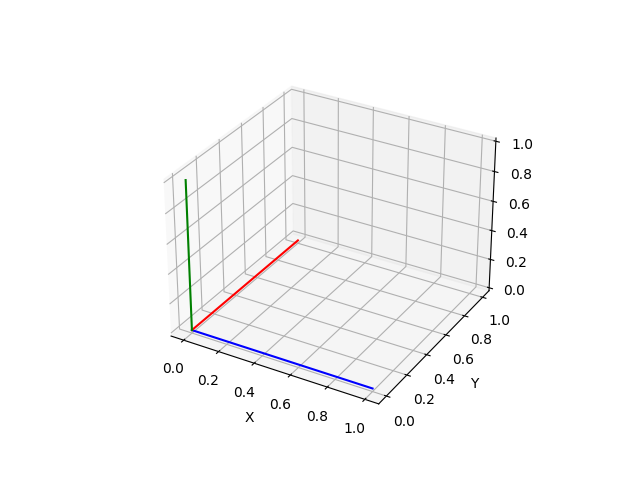

(4, 4)
[0. 0. 0. 1.] [6.123234e-17 1.000000e+00 0.000000e+00 1.000000e+00] [-1.000000e+00  6.123234e-17  0.000000e+00  1.000000e+00] [0. 0. 1. 1.]
(4, 4)
[0. 0. 0. 1.] [1. 0. 0. 1.] [0.000000e+00 6.123234e-17 1.000000e+00 1.000000e+00] [ 0.000000e+00 -1.000000e+00  6.123234e-17  1.000000e+00]


In [112]:
def get_df_axis(pose, prev_df):
    df = Denavit_Hart_Transform('test')
    df.fit(pose[0], pose[1], pose[2], pose[3])
    df.combine(prev_df)
    print(df.transformer.shape)
    origin = df.transform([0,0,0,1])
    x = df.transform([1,0,0,1])
    y = df.transform([0,1,0,1])
    z = df.transform([0,0,1,1])
    return origin, x, y, z, df

def draw_dh_tf(params):
    ax = plt.subplot(111, projection='3d')
    #ax.axes.set_xlim3d(left=-20, right=20) 
    ax.axes.set_xlabel('X')
    #ax.axes.set_ylim3d(bottom=-20, top=20) 
    ax.axes.set_ylabel('Y')
    #ax.axes.set_zlim3d(bottom=0, top=40) 
    origins = [[0],[0],[0]]
    prev_df = None
    for pose in params:
        o, x, y, z, prev_df = get_df_axis(pose, prev_df)
        print(o, x, y, z)
        origins[0].append(o[0])
        origins[1].append(o[1])
        origins[2].append(o[2])
        x = list(zip(o,x))
        y = list(zip(o,y))
        z = list(zip(o,z))
        ax.plot(x[0], x[1], x[2], 'b')
        ax.plot(y[0], y[1], y[2], 'r')
        ax.plot(z[0], z[1], z[2], 'g')
    ax.plot(origins[0], origins[1], origins[2], 'c')
    plt.show()
        
params = np.array([[0, 0, 0, np.pi/2], 
                   [0, np.pi/2, 0, 0]
                  ])        
draw_dh_tf(params)

In [282]:
class Arm:
    def __init__(self, init_joint_poses=None, restrictions=None, default_joint_angles=[90, 135, 45, 0, 90]):
        if init_joint_poses is None:
            # values are approximations for development purposes
            self.init_joint_poses = np.array([[0, 0, 2, np.pi/2, 0, 0],
                                               [11.5, 0, 0, 0, 0, 0],
                                               [0, -5.75, 0, 0, 0, 0],
                                               [-6, -3.5, 0, np.pi, -np.pi/2, 0]
                                              ]) 
        else:
            self.init_joint_poses = init_joint_poses
            
        # evironment dimensions
        self.envDim = 3
        # number of joints
        self.nJoints = len(self.init_joint_poses) + 1
        
        # an empty set of transformers
        self.autobots = []
        # initialize state constraints and objects
        self.j_rstr = np.zeros((self.nJoints, 2))
        self.poseActual = np.zeros((self.nJoints))
        self.joint_poses = np.zeros((self.nJoints, self.envDim))
        
        self.set_restrictions(restrictions)
        self.adjust_joints(default_joint_angles)
        
        # update kinematics
        self.forward_IK()
        
    def build_transformers(self):
        # the base joint is defined as the world origin
        self.autobots = []
        prev_tf = None
        for i,joint in enumerate(self.init_joint_poses):
            trns = Transformer(0.0, 0.0, np.radians(self.poseActual[i]), 'temp', protocol=['psi'])  
            translationActual = trns.transform(joint[:3], inverse=True)
            tf = Transformer(joint[3], joint[4], joint[5] + np.radians(self.poseActual[i]), f'Joint{i+1}',translation=translationActual, parent=prev_tf)
            if not prev_tf is None:
                self.autobots[-1].child = tf
            self.autobots.append(tf)
            prev_tf = tf
        
    def set_restrictions(self, restrictions):
        if restrictions is None:
            # default Arman joint restrictions
            assert 5 == self.nJoints, 'set_restrictions requested: failed, number of joints is not 5(default)'
            self.j_rstr = np.array([[0, 180],[45, 135],[0, 135],[0, 135],[0, 180]])
        else:
            assert len(restrictions) == self.nJoints, f'set_restrictions requested: failed, restrictions set length {len(restrictions)} != {self.nJoints}'
            self.j_rstr = restrictions
    
    def forward_IK(self):
        # update the transformers
        self.build_transformers()
        # Calculate the new joint poses.
        # Passing [0.0,0.0,0.0] to transform
        # will return the origin of that frame 
        # in parent coords.
        for i in range(self.nJoints-1, 0, -1):
            tf = self.autobots[i-1]
            point = np.array([0.0, 0.0, 0.0])
            while not tf is None:
                point = tf.transform(point, inverse=True)
                tf = tf.parent
            self.joint_poses[i] = point
            
    def adjust_joints(self, adjustments):
        assert len(adjustments) == self.nJoints, f'Angle adjustment requested: joint angle set shape mismatch {np.array(adjustments).shape} -> {self.nJoints}'
        # make sure no angle adjustments contradict valid configurations
        for i,joint in enumerate(self.poseActual):
            self.poseActual[i] = max(self.j_rstr[i][0], min(joint + adjustments[i], self.j_rstr[i][1]))
        self.forward_IK()
        
    def set_joints(self, poses):
        assert len(poses) == self.nJoints, f'Angle set requested: joint angle set shape mismatch {np.array(pose).shape} -> {self.nJoints}'
        # make sure no angle adjustments contradict valid configurations
        for i in range(self.nJoints):
            self.poseActual[i] = max(self.j_rstr[i][0], min(poses[i], self.j_rstr[i][1]))
        self.forward_IK()

In [283]:
class renderer:
    def __init__(self):
        self.verbose = True
        self.visualize = True

    def draw(self, joint_poses):
        ax = plt.subplot(111, projection='3d')
        ax.axes.set_xlim3d(left=-20, right=20) 
        ax.axes.set_xlabel('X')
        ax.axes.set_ylim3d(bottom=-20, top=20) 
        ax.axes.set_ylabel('Y')
        ax.axes.set_zlim3d(bottom=0, top=40) 
        origins = [[0],[0],[0]]
        for pose in joint_poses:
            origins[0].append(pose[0])
            origins[1].append(pose[1])
            origins[2].append(pose[2])
            ax.scatter(pose[0], pose[1], pose[2], color='r', marker='x')
        ax.plot(origins[0], origins[1], origins[2], color='c', alpha=0.6)
        plt.show()

<IPython.core.display.Javascript object>


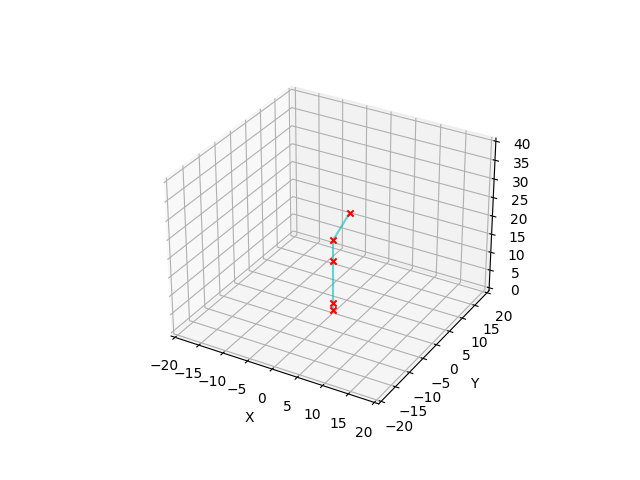

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.00000000e+00]
 [-7.04171910e-16  7.04171910e-16  1.35000000e+01]
 [-1.05625786e-15  1.40834382e-15  1.92500000e+01]
 [-9.03177014e-16  6.00000000e+00  2.27500000e+01]]
[90. 90. 90.  0.  0.]


In [288]:
"""This example shows how you can set the arm into a specific configuration"""
arm = Arm()
rend = renderer()
arm.set_joints([90,90,90,0,0])
rend.draw(arm.joint_poses)
print(arm.joint_poses)
print(arm.poseActual)

In [121]:
class Arman:
    def __init__(self):
        arm = Arm()
        
    def converge(self, heading_err, height_err):
        
        

[[4, 5, 6], [1, 2, 3]]

In [127]:
R = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
tnsl = [3.5, 6.5, 9.5, 1.0]
n = 4
m = 4
new_tf = np.zeros((n,m))
for i, row in enumerate(R):
    new_tf[i] = np.concatenate([np.array(row).reshape(m-1), [tnsl[i]]])
new_tf[m-1,n-1] = 1.0
print(new_tf)

[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]
 [0.  0.  0.  1. ]]


In [190]:
l = np.array([])
l[-1]

IndexError: index -1 is out of bounds for axis 0 with size 0